This code performs the following tasks:

1. Imports necessary libraries including numpy, PIL, keras, and sklearn.
2. Defines the directory containing the images (`DATA_DIR`) and a function `preprocess_image` to load and preprocess images by converting them to RGB format and resizing them to a target size of 224x224 pixels.
3. Loads and preprocesses images from the specified directory, iterating over each class folder and each image within those folders.
4. Converts the class labels to numerical format using `LabelEncoder` and then converts them to one-hot encoded format using `to_categorical`.
5. Splits the data into training and testing sets using `train_test_split`.
6. Loads the MobileNetV1 model pre-trained on ImageNet without the top classification layer.
7. Adds custom classification layers on top of the MobileNetV1 model, including a global average pooling layer and a dense layer with ReLU activation function followed by a softmax output layer.
8. Creates the model using the `Model` class from Keras, specifying the inputs and outputs.
9. Freezes the pre-trained layers of MobileNetV1 to prevent their weights from being updated during training.
10. Compiles the model using the Adam optimizer and categorical cross-entropy loss function.
11. Trains the model using the training data (`train_images` and `train_labels`) for 10 epochs, with a batch size of 32 and validation data specified.
12. Evaluates the trained model on the testing data (`test_images` and `test_labels`) and prints the test accuracy.

This code essentially loads images from a directory, preprocesses them, builds a transfer learning model using MobileNetV1, trains the model, and evaluates its performance.

In [3]:
import os
import numpy as np
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.applications import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

# Directory containing the images
DATA_DIR = '/Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy'

# Function to load and preprocess images
def preprocess_image(img_path, target_size=(224, 224)):
    try:
        img = Image.open(img_path).convert('RGB')  # Convert to RGB
        img = img.resize(target_size)
        img_array = np.array(img)
        return img_array
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        return None

# Load and preprocess images
images = []
labels = []
for cls in os.listdir(DATA_DIR):
    class_dir = os.path.join(DATA_DIR, cls)
    if os.path.isdir(class_dir):  # Check if it's a directory
        # Iterate over images in the class folder
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img_array = preprocess_image(img_path)
            if img_array is not None:
                images.append(img_array)
                labels.append(cls)

# Convert labels to numerical format
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert numerical labels to one-hot encoded format
NUM_CLASSES = len(set(labels))
labels_array = np.array(labels_encoded)
train_labels_one_hot = to_categorical(labels_array, num_classes=NUM_CLASSES)

# Convert images and labels to numpy arrays
images_array = np.array(images)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images_array, train_labels_one_hot, test_size=0.2, random_state=42)

# Load MobileNetV1 pre-trained on ImageNet without the top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of MobileNetV1
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)  # Add additional dense layer if needed
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)


Error loading image /Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/Rosary_Pea/.DS_Store: cannot identify image file '/Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/Rosary_Pea/.DS_Store'
Error loading image /Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/Cicuta_/.DS_Store: cannot identify image file '/Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/Cicuta_/.DS_Store'
Error loading image /Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/English_Yew/.DS_Store: cannot identify image file '/Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/English_Yew/.DS_Store'
Error loading image /Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/.DS_Store/right: [Errno 21] Is a directory: '/Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/.DS_Store/right'
Error loading image /Users/vaidehipate

Model Version 2 with enhancement - Freeze the pre-trained layers

In [1]:
import os
import numpy as np
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.applications import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from sklearn.metrics import classification_report

# Directory containing the images
DATA_DIR = '/Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy'

# Function to load and preprocess images
def preprocess_image(img_path, target_size=(224, 224)):
    try:
        img = Image.open(img_path).convert('RGB')  # Convert to RGB
        img = img.resize(target_size)
        img_array = np.array(img)
        return img_array
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        return None

# Load and preprocess images
images = []
labels = []
for cls in os.listdir(DATA_DIR):
    class_dir = os.path.join(DATA_DIR, cls)
    if os.path.isdir(class_dir):  # Check if it's a directory
        # Iterate over images in the class folder
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img_array = preprocess_image(img_path)
            if img_array is not None:
                images.append(img_array)
                labels.append(cls)

# Convert labels to numerical format
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert numerical labels to one-hot encoded format
NUM_CLASSES = len(set(labels))
labels_array = np.array(labels_encoded)
train_labels_one_hot = to_categorical(labels_array, num_classes=NUM_CLASSES)

# Convert images and labels to numpy arrays
images_array = np.array(images)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images_array, train_labels_one_hot, test_size=0.2, random_state=42)

# Load MobileNetV1 pre-trained on ImageNet without the top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of MobileNetV1
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)  # Add additional dense layer if needed
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Make predictions
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot evaluation metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

# Print evaluation metrics
print("Test Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate classification report for the test set
test_classification_report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)

# Print classification report
print("Test Classification Report:")
print(test_classification_report)


Error loading image /Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/Rosary_Pea/.DS_Store: cannot identify image file '/Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/Rosary_Pea/.DS_Store'
Error loading image /Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/Cicuta_/.DS_Store: cannot identify image file '/Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/Cicuta_/.DS_Store'
Error loading image /Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/English_Yew/.DS_Store: cannot identify image file '/Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/English_Yew/.DS_Store'
Error loading image /Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/.DS_Store/right: [Errno 21] Is a directory: '/Users/vaidehipatel/Documents/Course Sem 2/GWAR/Rotated_Plants_Dataset_copy/.DS_Store/right'
Error loading image /Users/vaidehipate

NameError: name 'accuracy_score' is not defined

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

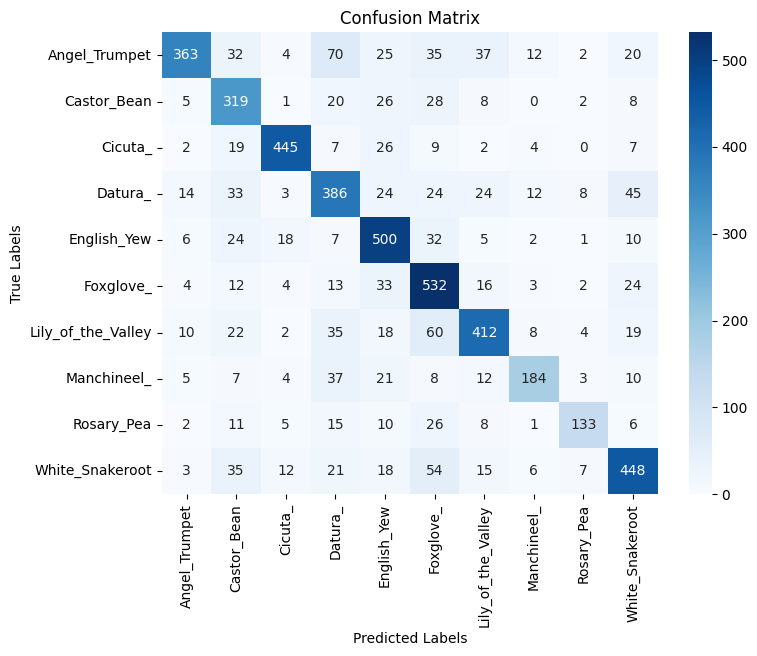

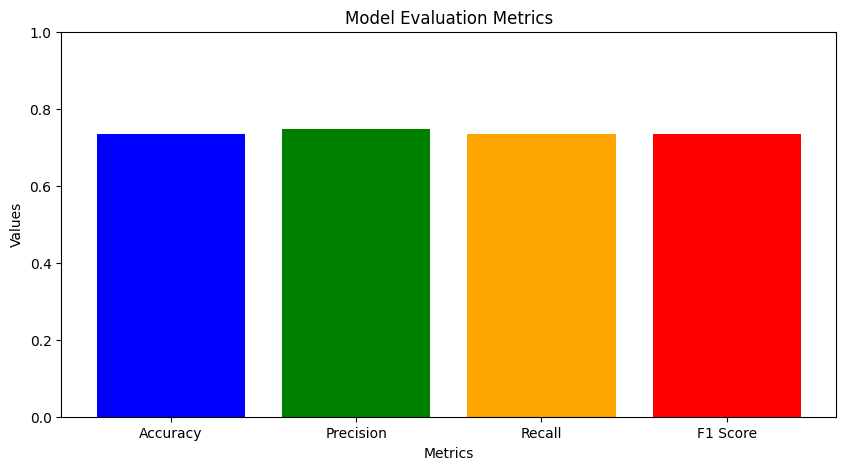

Test Metrics:
Accuracy: 0.7332545311268716
Precision: 0.7469976253337469
Recall: 0.7332545311268716
F1 Score: 0.733358918687191
Test Classification Report:
                    precision    recall  f1-score   support

     Angel_Trumpet       0.88      0.60      0.72       600
       Castor_Bean       0.62      0.76      0.69       417
           Cicuta_       0.89      0.85      0.87       521
           Datura_       0.63      0.67      0.65       573
       English_Yew       0.71      0.83      0.77       605
         Foxglove_       0.66      0.83      0.73       643
Lily_of_the_Valley       0.76      0.70      0.73       590
       Manchineel_       0.79      0.63      0.70       291
        Rosary_Pea       0.82      0.61      0.70       217
   White_Snakeroot       0.75      0.72      0.74       619

          accuracy                           0.73      5076
         macro avg       0.75      0.72      0.73      5076
      weighted avg       0.75      0.73      0.73      5076



In [3]:
# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot evaluation metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

# Print evaluation metrics
print("Test Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate classification report for the test set
test_classification_report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)

# Print classification report
print("Test Classification Report:")
print(test_classification_report)
